In [5]:
import pandas as pd

# Load Benin data
benin_df = pd.read_csv('data/benin_clean.csv')

# Load Sierra Leone data
sierraleone_df = pd.read_csv('data/sierraleone-bumbuna_clean.csv')

# Load Togo data
togo_df = pd.read_csv('data/togo-dapaong_qc_clean.csv')

In [8]:
# Add a 'Country' column to each
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierraleone'
togo_df['Country'] = 'Togo'

# Concatenate into one DataFrame
all_data = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

C:\Users\samuel\AppData\Local\Temp\ipykernel_3656\1605728312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_data, palette='Set2')


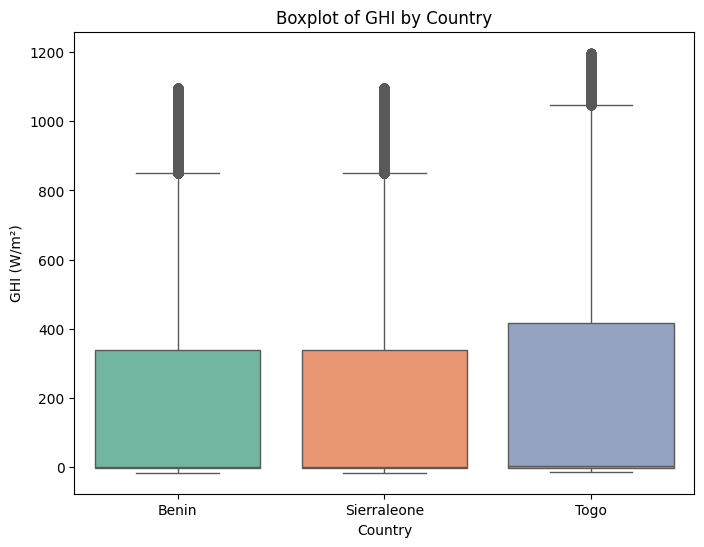

C:\Users\samuel\AppData\Local\Temp\ipykernel_3656\1605728312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_data, palette='Set2')


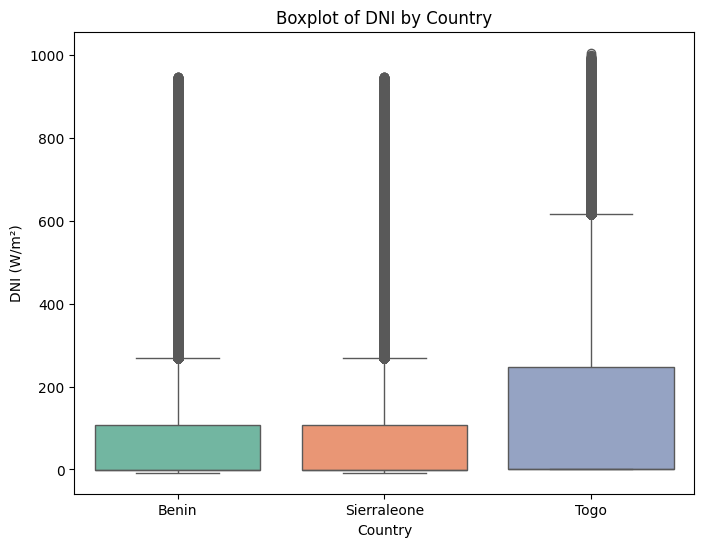

C:\Users\samuel\AppData\Local\Temp\ipykernel_3656\1605728312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_data, palette='Set2')


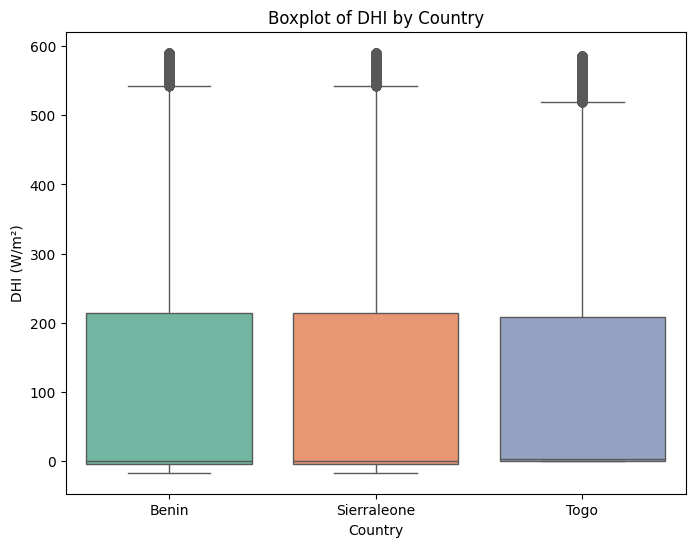

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Country', y=metric, data=all_data, palette='Set2')
    plt.title(f'Boxplot of {metric} by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()

In [10]:
summary_stats = all_data.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print(summary_stats)

                    GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        189.554363    0.3  286.353317  116.376337   -0.1  218.652659   
Sierraleone  189.554363    0.3  286.353317  116.376337   -0.1  218.652659   
Togo         221.709585    2.1  317.123573  151.258469    0.0  250.956962   

                    DHI                     
                   mean median         std  
Country                                     
Benin        107.057789   -0.1  152.485319  
Sierraleone  107.057789   -0.1  152.485319  
Togo         111.105965    2.5  150.864116  


In [11]:
import scipy.stats as stats

# Extract GHI values for each country
ghi_benin = all_data[all_data['Country'] == 'Benin']['GHI']
ghi_sierraleone = all_data[all_data['Country'] == 'Sierraleone']['GHI']
ghi_togo = all_data[all_data['Country'] == 'Togo']['GHI']

In [12]:
anova_result = stats.f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"ANOVA p-value: {anova_result.pvalue}")

ANOVA p-value: 0.0


In [13]:
kruskal_result = stats.kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"Kruskal–Wallis p-value: {kruskal_result.pvalue}")

Kruskal–Wallis p-value: 0.0


### Key Observations

- **Togo**:- shows the highest average GHI, indicating generally better solar potential compared to Benin and Sierra Leone.
- **Benin* and **Sierra Leone** have identical average GHI values, suggesting similar overall solar conditions.
- All countries exhibit high variability in GHI, highlighting significant differences in solar potential across different locations within each country.

C:\Users\samuel\AppData\Local\Temp\ipykernel_3656\842656385.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GHI', y='Country', data=avg_ghi, palette='viridis')


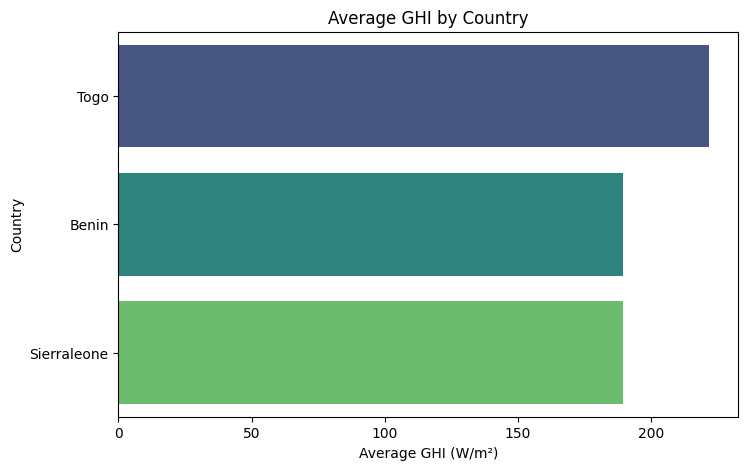

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average GHI per country
avg_ghi = all_data.groupby('Country')['GHI'].mean().reset_index()

# Sort countries by average GHI
avg_ghi = avg_ghi.sort_values(by='GHI', ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='GHI', y='Country', data=avg_ghi, palette='viridis')
plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.ylabel('Country')
plt.show()